# Movie review classification with NLTK

In [1]:
import random
import nltk

In [2]:
import nltk
import numpy as np
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0]
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft
     

In [4]:
def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [5]:
tagged_sentence = nltk.corpus.treebank.tagged_sents(tagset='universal')

In [6]:
tagged_sentence

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], ...]

In [7]:
def ext_ft(tg_sent):
    sent, tag = [], []
 
    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg), index))
            tag.append(tg[index][1])
 
    return sent, tag

In [8]:
for tg in tagged_sentence:
    [a,b] = zip(*tg)
    print(list(a))



['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['Mr.', 'Vinken', 'is', 'chairman', 'of', 'Elsevier', 'N.V.', ',', 'the', 'Dutch', 'publishing', 'group', '.']
['Rudolph', 'Agnew', ',', '55', 'years', 'old', 'and', 'former', 'chairman', 'of', 'Consolidated', 'Gold', 'Fields', 'PLC', ',', 'was', 'named', '*-1', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.']
['A', 'form', 'of', 'asbestos', 'once', 'used', '*', '*', 'to', 'make', 'Kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of', 'workers', 'exposed', '*', 'to', 'it', 'more', 'than', '30', 'years', 'ago', ',', 'researchers', 'reported', '0', '*T*-1', '.']
['The', 'asbestos', 'fiber', ',', 'crocidolite', ',', 'is', 'unusually', 'resilient', 'once', 'it', 'enters', 'the', 'lungs', ',', 'with', 'even', 'brief', 'exposures', '

['Until', 'Congress', 'acts', ',', 'the', 'government', 'has', "n't", 'any', 'authority', '*', 'to', 'issue', 'new', 'debt', 'obligations', 'of', 'any', 'kind', ',', 'the', 'Treasury', 'said', '0', '*T*-1', '.']
['The', 'government', "'s", 'borrowing', 'authority', 'dropped', 'at', 'midnight', 'Tuesday', 'to', '$', '2.80', 'trillion', '*U*', 'from', '$', '2.87', 'trillion', '*U*', '.']
['Legislation', '0', '*T*-1', 'to', 'lift', 'the', 'debt', 'ceiling', 'is', 'ensnarled', '*-11', 'in', 'the', 'fight', 'over', '*', 'cutting', 'capital-gains', 'taxes', '.']
['The', 'House', 'has', 'voted', '*-1', 'to', 'raise', 'the', 'ceiling', 'to', '$', '3.1', 'trillion', '*U*', ',', 'but', 'the', 'Senate', 'is', "n't", 'expected', '*-2', 'to', 'act', 'until', 'next', 'week', 'at', 'the', 'earliest', '.']
['The', 'Treasury', 'said', '0', 'the', 'U.S.', 'will', 'default', 'on', 'Nov.', '9', 'if', 'Congress', 'does', "n't", 'act', 'by', 'then', '.']
['Clark', 'J.', 'Vitulli', 'was', 'named', '*-12', 's

['The', 'refund', 'was', 'about', '$', '55', 'million', '*U*', 'more', 'than', '*', 'previously', 'ordered', '*-1', 'by', 'the', 'Illinois', 'Commerce', 'Commission', 'and', 'trade', 'groups', 'said', '0', 'it', 'may', 'be', 'the', 'largest', 'ever', 'required', '*', 'of', 'a', 'state', 'or', 'local', 'utility', '.']
['State', 'court', 'Judge', 'Richard', 'Curry', 'ordered', 'Edison', '*-1', 'to', 'make', 'average', 'refunds', 'of', 'about', '$', '45', 'to', '$', '50', '*U*', 'each', 'to', 'Edison', 'customers', 'who', '*T*-18', 'have', 'received', 'electric', 'service', 'since', 'April', '1986', ',', 'including', 'about', 'two', 'million', 'customers', 'who', '*T*-19', 'have', 'moved', 'during', 'that', 'period', '.']
['Judge', 'Curry', 'ordered', 'the', 'refunds', '*-1', 'to', 'begin', 'Feb.', '1', 'and', 'said', 'that', 'he', 'would', "n't", 'entertain', 'any', 'appeals', 'or', 'other', 'attempts', '*', 'to', 'block', 'his', 'order', 'by', 'Commonwealth', 'Edison', '.']
['``', 'The'

['Esso', 'Australia', 'Ltd.', ',', 'a', 'unit', 'of', 'New', 'York-based', 'Exxon', 'Corp.', ',', 'and', 'Broken', 'Hill', 'Pty.', 'operate', 'the', 'fields', 'in', 'a', 'joint', 'venture', '.']
['Esso', 'said', '0', 'the', 'Whiting', 'field', 'started', 'production', 'Tuesday', '.']
['Output', 'will', 'be', 'gradually', 'increased', '*-1', 'until', 'it', 'reaches', 'about', '11,000', 'barrels', 'a', 'day', '.']
['The', 'field', 'has', 'reserves', 'of', '21', 'million', 'barrels', '.']
['Reserves', 'for', 'the', 'five', 'new', 'fields', 'total', '50', 'million', 'barrels', '.']
['The', 'Perch', 'and', 'Dolphin', 'fields', 'are', 'expected', '*-3', 'to', 'start', '*-1', 'producing', 'early', 'next', 'year', ',', 'and', 'the', 'Seahorse', 'and', 'Tarwhine', 'fields', 'later', 'next', 'year', '.']
['Esso', 'said', '0', 'the', 'fields', 'were', 'developed', '*-36', 'after', 'the', 'Australian', 'government', 'decided', 'in', '1987', '*-2', 'to', 'make', 'the', 'first', '30', 'million', 'ba

['If', 'the', 'debts', 'are', 'repaid', '*-49', ',', 'it', 'could', 'clear', 'the', 'way', '0', 'for', 'Soviet', 'bonds', 'to', 'be', 'sold', '*-50', 'in', 'the', 'U.S.', '*T*-1', '.']
['However', ',', 'after', 'two', 'meetings', 'with', 'the', 'Soviets', ',', 'a', 'State', 'Department', 'spokesman', 'said', 'that', 'it', '*EXP*-1', "'s", '``', 'too', 'early', '*', 'to', 'say', "''", 'whether', 'that', 'will', 'happen', '.']
['Coincident', 'with', 'the', 'talks', ',', 'the', 'State', 'Department', 'said', '0', 'it', 'has', 'permitted', 'a', 'Soviet', 'bank', 'to', 'open', 'a', 'New', 'York', 'branch', '.']
['The', 'branch', 'of', 'the', 'Bank', 'for', 'Foreign', 'Economic', 'Affairs', 'was', 'approved', '*-1', 'last', 'spring', 'and', 'opened', 'in', 'July', '.']
['But', 'a', 'Soviet', 'bank', 'here', 'would', 'be', 'crippled', '*-51', 'unless', 'Moscow', 'found', 'a', 'way', '0', '*', 'to', 'settle', 'the', '$', '188', 'million', '*U*', 'debt', ',', 'which', '*T*-1', 'was', 'lent', '*

['That', "'s", 'not', '*', 'to', 'say', 'that', 'the', 'nutty', 'plot', 'of', '``', 'A', 'Wild', 'Sheep', 'Chase', "''", 'is', 'rooted', '*-57', 'in', 'reality', '.']
['It', "'s", 'imaginative', 'and', 'often', 'funny', '.']
['A', 'disaffected', ',', 'hard-drinking', ',', 'nearly-30', 'hero', 'sets', 'off', 'for', 'snow', 'country', 'in', 'search', 'of', 'an', 'elusive', 'sheep', 'with', 'a', 'star', 'on', 'its', 'back', 'at', 'the', 'behest', 'of', 'a', 'sinister', ',', 'erudite', 'mobster', 'with', 'a', 'Stanford', 'degree', '.']
['He', 'has', 'in', 'tow', 'his', 'prescient', 'girlfriend', ',', 'whose', 'sassy', 'retorts', '*T*-54', 'mark', 'her', 'as', 'anything', 'but', 'a', 'docile', 'butterfly', '.']
['Along', 'the', 'way', ',', 'he', 'meets', 'a', 'solicitous', 'Christian', 'chauffeur', 'who', '*T*-55', 'offers', 'the', 'hero', 'God', "'s", 'phone', 'number', ';', 'and', 'the', 'Sheep', 'Man', ',', 'a', 'sweet', ',', 'roughhewn', 'figure', 'who', '*T*-56', 'wears', '--', 'what',

['The', 'screen', 'shows', 'two', 'distorted', ',', 'unrecognizable', 'photos', ',', 'presumably', 'of', 'two', 'politicians', '.']
['``', '*', 'Compare', 'two', 'candidates', 'for', 'mayor', ',', "''", 'says', '*T*-1', 'the', 'announcer', '.']
['``', 'One', 'says', '0', 'he', "'s", 'for', '*', 'banning', 'cop-killer', 'bullets', '.']
['The', 'other', 'has', 'opposed', 'a', 'ban', 'on', 'cop-killer', 'bullets', '.']
['One', 'claims', '0', 'he', "'s", 'pro-choice', '.']
['The', 'other', 'has', 'opposed', 'a', 'woman', "'s", 'right', '*', 'to', 'choose', '.', "''"]
['``', 'Funny', 'thing', ',', "''", 'says', '*T*-1', 'the', 'kicker', ',', '``', 'both', 'these', 'candidates', 'are', 'named', '*-2', 'Rudolph', 'Giuliani', '.', "''"]
['Who', "'s", '*T*-1', 'telling', 'the', 'truth', '?']
['Everybody', '--', 'and', 'nobody', '.']
['It', "'s", 'a', 'classic', 'situation', 'of', 'ads', 'that', '*T*-75', 'are', 'true', 'but', 'not', 'always', 'fully', 'accurate', '.']
['Mr.', 'Dinkins', 'did', 

['She', 'won', 'grant', 'money', 'for', 'the', 'school', ',', 'advised', 'cheerleaders', ',', 'ran', 'the', 'pep', 'club', ',', 'proposed', 'and', 'taught', 'a', 'new', '``', 'Cultural', 'Literacy', "''", 'class', 'in', 'Western', 'Civilization', 'and', 'was', 'chosen', '*-1', 'by', 'the', 'school', 'PTA', 'as', '``', 'Teacher', 'of', 'the', 'Year', '.', "''"]
['``', 'She', 'was', 'an', 'inspirational', 'lady', ';', 'she', 'had', 'it', 'all', 'together', ',', "''", 'says', '*T*-1', 'Laura', 'Dobson', ',', 'a', 'freshman', 'at', 'the', 'University', 'of', 'South', 'Carolina', 'who', '*T*-90', 'had', 'Mrs.', 'Yeargin', 'in', 'the', 'teacher-cadet', 'class', 'last', 'year', '.']
['She', 'says', 'that', 'because', 'of', 'Mrs.', 'Yeargin', 'she', 'gave', 'up', 'ambitions', 'in', 'architecture', 'and', 'is', 'studying', '*-1', 'to', 'become', 'a', 'teacher', '.']
['Mary', 'Beth', 'Marchand', ',', 'a', 'Greenville', '11th', 'grader', ',', 'also', 'says', '0', 'Mrs.', 'Yeargin', 'inspired', 'h

['Scoring', 'High', 'and', 'Learning', 'Materials', 'are', 'the', 'best-selling', 'preparation', 'tests', '.']
['Michael', 'Kean', ',', 'director', 'of', 'marketing', 'for', 'CTB', 'Macmillan\\/McGraw', ',', 'the', 'Macmillan\\/McGraw', 'division', 'that', '*T*-106', 'publishes', 'Learning', 'Materials', ',', 'says', '0', 'it', 'is', "n't", 'aimed', '*-1', 'at', '*', 'improving', 'test', 'scores', '.']
['He', 'also', 'asserted', 'that', 'exact', 'questions', 'were', "n't", 'replicated', '*-1', '.']
['When', '*', 'referred', '*-2', 'to', 'the', 'questions', 'that', '*T*-107', 'matched', '*T*-1', ',', 'he', 'said', '0', 'it', 'was', 'coincidental', '.']
['Mr.', 'Kaminski', ',', 'the', 'schoolteacher', ',', 'and', 'William', 'Mehrens', ',', 'a', 'Michigan', 'State', 'University', 'education', 'professor', ',', 'concluded', 'in', 'a', 'study', 'last', 'June', 'that', 'CAT', 'test', 'versions', 'of', 'Scoring', 'High', 'and', 'Learning', 'Materials', 'should', "n't", 'be', 'used', '*-2', 'i

['The', 'warnings', ',', 'issued', '*', 'to', 'at', 'least', '100', 'criminal', 'defense', 'attorneys', 'in', 'several', 'major', 'cities', 'in', 'the', 'last', 'week', ',', 'have', 'led', 'to', 'an', 'outcry', 'by', 'members', 'of', 'the', 'organized', 'bar', ',', 'who', '*T*-125', 'claim', '0', 'the', 'information', 'is', 'protected', '*-1', 'by', 'attorney-client', 'privilege', '.']
['The', 'IRS', 'warnings', 'stem', 'from', 'a', '1984', 'law', 'that', '*T*-1', 'requires', 'anyone', 'who', '*T*-126', 'receives', 'more', 'than', '$', '10,000', '*U*', 'in', 'cash', 'from', 'a', 'client', 'or', 'customer', 'in', 'one', 'or', 'more', 'related', 'transactions', '``', 'in', 'the', 'course', 'of', 'trade', 'or', 'business', "''", 'to', 'report', 'the', 'payment', 'on', 'a', 'document', 'known', '*', 'as', 'Form', '8300', '.']
['The', 'form', 'asks', 'for', 'such', 'details', 'as', 'the', 'client', "'s", 'name', ',', 'Social', 'Security', 'number', ',', 'passport', 'number', 'and', 'details

['LSI', 'Logic', 'Corp.', 'reported', 'a', 'surprise', '$', '35.7', 'million', '*U*', 'third-quarter', 'net', 'loss', ',', 'including', 'a', 'special', 'restructuring', 'charge', 'that', '*T*-145', 'reflects', 'a', 'continuing', 'industry-wide', 'slowdown', 'in', 'semiconductor', 'demand', '.']
['In', 'September', ',', 'the', 'custom-chip', 'maker', 'said', '0', 'excess', 'capacity', 'and', 'lagging', 'billings', 'would', 'result', 'in', 'an', 'estimated', '$', '2', 'million', 'to', '$', '3', 'million', '*U*', 'net', 'loss', 'for', 'the', 'third', 'quarter', '.']
['But', 'company', 'officials', 'said', 'yesterday', 'that', 'they', 'decided', '*-2', 'to', 'take', 'a', '$', '43', 'million', '*U*', 'pretax', 'charge', 'for', 'the', 'period', '*-3', 'to', 'cover', 'a', 'restructuring', 'of', 'world-wide', 'manufacturing', 'operations', ',', '*-4', 'citing', 'extended', 'weakness', 'in', 'the', 'market', 'as', 'well', 'as', 'a', 'decision', '*', 'to', 'switch', 'to', 'more', 'economical', '

['He', 'said', '0', 'Chrysler', 'fully', 'expects', '*-1', 'to', 'have', 'them', 'installed', '*-2', 'across', 'its', 'light-truck', 'line', 'by', 'the', 'Sept.', '1', ',', '1991', ',', 'deadline', '.']
['Chrysler', 'said', '0', 'its', 'trucks', 'and', 'vans', 'already', 'meet', 'the', 'roof-crush', 'resistance', 'standard', 'for', 'cars', '.']
['John', 'Leinonen', ',', 'executive', 'engineer', 'of', 'Ford', 'Motor', 'Co.', "'s", 'auto-safety', 'office', ',', 'said', '0', 'Ford', 'trucks', 'have', 'met', 'car', 'standards', 'for', 'roof-crush', 'resistance', 'since', '1982', '.']
['Ford', 'began', '*-1', 'installing', 'the', 'rear-seat', 'belts', 'in', 'trucks', 'with', 'its', 'F-series', 'Crew', 'Cab', 'pickups', 'in', 'the', '1989', 'model', 'year', '.']
['The', 'new', 'Explorer', 'sport-utility', 'vehicle', ',', 'set', '*', 'for', 'introduction', 'next', 'spring', ',', 'will', 'also', 'have', 'the', 'rear-seat', 'belts', '.']
['Mr.', 'Leinonen', 'said', '0', 'he', 'expects', 'Ford',

['Michael', 'Basham', ',', 'deputy', 'assistant', 'secretary', 'for', 'federal', 'finance', ',', 'said', '0', 'the', 'Treasury', 'may', 'wait', 'until', 'late', 'Monday', 'or', 'even', 'early', 'Tuesday', '*-2', 'to', 'announce', 'whether', 'the', 'autions', 'are', '*-1', 'to', 'be', 'rescheduled', '*-106', '.']
['Unless', 'it', 'can', 'raise', 'money', 'in', 'financial', 'markets', ',', 'Mr.', 'Basham', 'said', '0', '*T*-1', ',', 'the', 'federal', 'government', 'wo', "n't", 'have', 'the', 'cash', '0', '*', 'to', 'pay', 'off', '$', '13.8', 'billion', '*U*', 'in', 'Treasury', 'bills', 'that', '*T*-176', 'mature', 'on', 'Thursday', '*T*-2', '.']
['Without', 'congressional', 'action', ',', 'the', 'Treasury', 'ca', "n't", 'sell', 'any', 'new', 'securities', '--', 'even', 'savings', 'bonds', '.']
['But', 'despite', 'partisan', 'bickering', 'over', 'the', 'debt', 'ceiling', ',', 'which', '*T*-177', 'has', 'become', 'entangled', 'in', 'the', 'fight', 'over', '*', 'cutting', 'capital-gains', '

['The', 'heated', 'talk', 'stirred', '*-1', 'up', 'by', 'recent', 'Japanese', 'investments', 'in', 'the', 'U.S.', 'is', 'focusing', 'attention', 'on', 'the', 'differences', 'in', 'investment', 'climate', ',', 'even', 'though', 'it', "'s", 'only', 'one', 'of', 'many', 'subjects', '0', '*T*-2', 'to', 'be', 'covered', '*-116', 'in', 'the', 'bilateral', 'talks', ',', 'known', '*', 'as', 'the', 'Structural', 'Impediments', 'Initiative', '.']
['The', 'Japanese', '``', 'should', 'see', 'this', 'rhetoric', 'as', 'a', 'signal', 'of', 'the', 'need', 'for', 'a', 'change', 'in', 'their', 'own', 'economy', ',', "''", 'says', '0', '*T*-1', 'Charles', 'Dallara', ',', 'U.S.', 'assistant', 'Treasury', 'secretary', ',', 'who', '*T*-184', 'has', 'been', 'in', 'Tokyo', 'this', 'week', '*-2', 'informally', 'discussing', 'the', 'impending', 'negotiations', 'with', 'government', 'and', 'business', 'leaders', '.']
['``', 'We', 'have', 'a', 'long', 'history', 'of', '*', 'maintaining', 'an', 'open', 'direct-inv

['``', 'You', "'re", 'dead', 'in', 'the', 'water', 'if', 'you', 'are', "n't", 'segmenting', 'the', 'market', ',', "''", 'says', '*T*-1', 'Anne', 'Moore', ',', 'president', 'of', 'Synergistics', 'Research', 'Corp.', ',', 'a', 'bank', 'consulting', 'firm', 'in', 'Atlanta', '.']
['NCNB', 'Corp.', 'of', 'Charlotte', ',', 'N.C.', ',', 'recently', 'introduced', 'its', 'Financial', 'Connections', 'Program', 'aimed', '*', 'at', 'young', 'adults', 'just', 'starting', 'careers', '.']
['The', 'program', 'not', 'only', 'offers', 'a', 'pre-approved', 'car', 'loan', 'up', 'to', '$', '18,000', '*U*', ',', 'but', 'throws', 'in', 'a', 'special', 'cash-flow', 'statement', '0', '*T*-1', 'to', 'help', 'in', '*', 'saving', 'money', '.']
['In', 'September', ',', 'Union', 'Planters', 'Corp.', 'of', 'Memphis', ',', 'Tenn.', ',', 'launched', 'The', 'Edge', 'account', ',', 'a', 'package', 'designed', '*', 'for', 'the', '``', 'thirtysomething', "''", 'crowd', 'with', 'services', 'that', '*T*-197', 'include', 'a'

['That', 'has', 'been', 'particularly', 'true', 'this', 'year', 'with', 'many', 'companies', 'raising', 'their', 'payouts', 'more', 'than', '10', '%', '.']
['But', '*', 'do', "n't", 'breathe', 'too', 'easy', ':', 'Those', 'dividend', 'increases', 'may', 'signal', 'trouble', 'ahead', 'for', 'stock', 'prices', ',', 'some', 'analysts', 'warn', '0', '*T*-1', '.']
['In', 'the', 'past', ',', 'they', 'say', '0', '*T*-1', ',', 'the', 'strongest', 'dividend', 'growth', 'has', 'often', 'come', 'at', 'times', 'when', 'the', 'stock-market', 'party', 'was', 'almost', 'over', '*T*-2', '.']
['That', 'can', 'be', 'a', 'trap', 'for', 'unwary', 'investors', ',', 'says', '0', '*T*-1', 'Richard', 'Bernstein', ',', 'senior', 'quantitative', 'analyst', 'at', 'Merrill', 'Lynch', '&', 'Co', '.']
['Strong', 'dividend', 'growth', ',', 'he', 'says', '0', '*T*-1', ',', 'is', '``', 'the', 'black', 'widow', 'of', 'valuation', "''", '--', 'a', 'reference', 'to', 'the', 'female', 'spiders', 'that', '*T*-231', 'attrac

['The', 'National', 'Association', 'of', 'Securities', 'Dealers', ',', 'the', 'self-regulatory', 'organization', 'for', 'the', 'over-the-counter', 'securities', 'markets', ',', 'disciplined', 'a', 'number', 'of', 'firms', 'and', 'individuals', 'for', 'alleged', 'violations', 'of', 'industry', 'rules', '.']
['Two', 'firms', 'were', 'expelled', '*-150', 'from', 'the', 'NASD', ',', 'three', 'were', 'suspended', 'or', 'barred', '*-1', 'and', 'nine', 'were', 'fined', '*-151', '.']
['First', 'Securities', 'Group', 'of', 'California', 'and', 'a', 'principal', 'of', 'the', 'firm', ',', 'Louis', 'Fernando', 'Vargas', 'of', 'Marina', 'del', 'Rey', ',', 'Calif.', ',', 'were', 'jointly', 'fined', '*-1', '$', '15,000', '*U*', 'and', 'expelled', '*-1', 'for', 'alleged', 'violations', 'of', 'reporting', 'requirements', 'on', 'securities', 'sales', '.']
['Also', ',', 'Mr.', 'Vargas', 'was', 'barred', '*-152', 'from', 'association', 'with', 'any', 'NASD', 'member', '.']
['Neither', 'First', 'Securities

['Zenith', 'Data', 'Systems', 'Corp.', ',', 'a', 'subsidiary', 'of', 'Zenith', 'Electronics', 'Corp.', ',', 'received', 'a', '$', '534', 'million', '*U*', 'Navy', 'contract', 'for', 'software', 'and', 'services', 'of', 'microcomputers', 'over', 'an', '84-month', 'period', '.']
['Rockwell', 'International', 'Corp.', 'won', 'a', '$', '130.7', 'million', '*U*', 'Air', 'Force', 'contract', 'for', 'AC-130U', 'gunship', 'replacement', 'aircraft', '.']
['Martin', 'Marietta', 'Corp.', 'was', 'given', '*-166', 'a', '$', '29.9', 'million', '*U*', 'Air', 'Force', 'contract', 'for', 'low-altitude', 'navigation', 'and', 'targeting', 'equipment', '.']
['Federal', 'Data', 'Corp.', 'got', 'a', '$', '29.4', 'million', '*U*', 'Air', 'Force', 'contract', 'for', 'intelligence', 'data', 'handling', '.']
['For', 'six', 'years', ',', 'T.', 'Marshall', 'Hahn', 'Jr.', 'has', 'made', 'corporate', 'acquisitions', 'in', 'the', 'George', 'Bush', 'mode', ':', 'kind', 'and', 'gentle', '.']
['The', 'question', 'now',

['``', 'In', 'Moscow', ',', 'they', 'kept', '*-5', 'asking', 'us', 'things', 'like', ',', '`', 'Why', 'do', 'you', 'make', '15', 'different', 'corkscrews', ',', 'when', 'all', '0', 'you', 'need', '*T*-3', 'is', 'one', 'good', 'one', '*T*-4', '*T*-2', '?', "'", "''", 'he', 'says', '*T*-1', '.']
['``', 'They', 'got', 'us', 'thinking', '0', 'maybe', 'we', 'should', 'be', 'helping', 'U.S.', 'companies', 'improve', 'existing', 'products', 'rather', 'than', '*-1', 'always', 'developing', 'new', 'ones', '.', "''"]
['Seed', 'for', 'Jail', 'Solution', 'Fails', '*-1', 'to', 'Take', 'Root']
['IT', "'S", 'A', 'TWO', 'BIRDS', 'with', 'one', 'stone', 'deal', ':', 'Eggers', 'Group', 'architects', 'propose', '*-2', 'using', 'grain', 'elevators', '*-1', 'to', 'house', 'prisoners', '.']
['It', 'would', 'ease', 'jail', 'overcrowding', 'while', '*-1', 'preserving', 'historic', 'structures', ',', 'the', 'company', 'says', '0', '*T*-2', '.']
['But', 'New', 'York', 'state', ',', 'which', '*T*-13', 'is', 'see

['I', 'had', 'sought', ',', 'in', 'my', 'suit', ',', 'the', 'right', '*', 'to', 'print', 'Voice', 'material', ',', 'which', '*T*-2', 'had', 'been', 'denied', 'me', '*-36', ',', 'and', 'I', 'had', 'sought', 'a', 'right', '*', 'to', 'receive', 'the', 'information', ',', '*-3', 'arguing', 'in', 'effect', 'that', 'a', 'right', '*', 'to', 'print', 'government', 'information', 'is', "n't", 'very', 'helpful', 'if', 'I', 'have', 'no', 'right', '*', 'to', 'get', 'the', 'information', '.']
['But', 'the', 'court', 'disagreed', '.']
['``', 'The', 'First', 'Amendment', 'proscribes', 'the', 'government', 'from', '*-2', 'passing', 'laws', 'abridging', 'the', 'right', 'to', 'free', 'speech', ',', "''", 'Judge', 'Donald', "O'Brien", 'ruled', '*T*-1', '.']
['``', 'The', 'First', 'Amendment', 'does', 'not', 'prescribe', 'a', 'duty', 'upon', 'the', 'government', '*', 'to', 'assure', 'easy', 'access', 'to', 'information', 'for', 'members', 'of', 'the', 'press', '.', "''"]
['So', 'now', 'the', 'situation', 

['Robert', 'L.', 'Bernstein', ',', 'chairman', 'and', 'president', 'of', 'Random', 'House', 'Inc.', ',', 'announced', 'his', 'resignation', 'from', 'the', 'publishing', 'house', '0', 'he', 'has', 'run', '*T*-1', 'for', '23', 'years', '.']
['A', 'successor', 'was', "n't", 'named', '*-1', ',', 'which', '*T*-35', 'fueled', 'speculation', 'that', 'Mr.', 'Bernstein', 'may', 'have', 'clashed', 'with', 'S.I.', 'Newhouse', 'Jr.', ',', 'whose', 'family', 'company', ',', 'Advance', 'Publications', 'Inc.', ',', '*T*-2', 'owns', 'Random', 'House', '.']
['Abrupt', 'departures', 'are', "n't", 'unheard', 'of', '*-1', 'within', 'the', 'Newhouse', 'empire', '.']
['In', 'an', 'interview', ',', 'Mr.', 'Bernstein', 'said', '0', 'his', 'departure', '``', 'evolved', 'out', 'of', 'discussions', 'with', 'Si', 'Newhouse', 'and', 'that', "'s", 'the', 'decision', '0', 'I', 'reached', '*T*-1', '.', "''"]
['He', 'declined', '*-1', 'to', 'elaborate', ',', 'other', 'than', '*-1', 'to', 'say', ',', '``', 'It', 'just'

['The', 'council', ',', 'which', '*T*-61', 'is', 'alleged', '*-1', 'to', 'have', 'engaged', 'in', 'over', '600', 'deals', 'valued', '*', 'at', 'over', '#', '6', 'billion', '*U*', '-LRB-', '$', '9.5', 'billion', '*U*', '-RRB-', ',', 'lost', 'millions', 'of', 'pounds', 'from', 'soured', 'swap', 'deals', '.']
['At', 'one', 'point', ',', 'Hammersmith', 'is', 'reported', '*-1', 'to', 'have', 'accounted', 'for', 'as', 'much', 'as', '10', '%', 'of', 'the', 'sterling', 'market', 'in', 'interest-rate', 'swap', 'dealings', '.']
['When', 'two', 'parties', 'engage', 'in', 'an', 'interest-rate', 'swap', '*T*-1', ',', 'they', 'are', 'betting', 'against', 'each', 'other', 'on', 'future', 'rates', '.']
['Thus', ',', 'an', 'institution', 'obligated', '*', 'to', 'make', 'fixed-rate', 'interest', 'payments', 'on', 'debt', 'swaps', 'the', 'payments', 'with', 'another', 'making', 'floating-rate', 'payments', '.']
['In', 'most', 'of', 'the', 'British', 'transactions', ',', 'the', 'municipalities', 'agreed',

['The', 'administration', 'had', 'requested', 'roughly', 'the', 'same', 'amount', 'for', 'antitrust', 'enforcement', 'for', 'fiscal', '1990', 'as', '*', 'was', 'appropriated', '*-1', 'in', 'fiscal', '1989', '.']
['The', 'offsetting', 'fees', 'would', 'apply', 'to', 'filings', 'made', '*', 'under', 'the', 'Hart-Scott-Rodino', 'Act', '.']
['Under', 'that', 'law', ',', 'parties', 'proposing', 'mergers', 'or', 'acquisitions', 'valued', '*', 'at', '$', '15', 'million', '*U*', 'or', 'more', 'must', 'notify', 'FTC', 'and', 'Justice', 'Department', 'antitrust', 'regulators', 'before', '*-1', 'completing', 'the', 'transactions', '.']
['Currently', ',', 'the', 'government', 'charges', 'nothing', 'for', 'such', 'filings', '.']
['Proponents', 'of', 'the', 'funding', 'arrangement', 'predict', 'that', ',', 'based', 'on', 'recent', 'filing', 'levels', 'of', 'more', 'than', '2,000', 'a', 'year', ',', 'the', 'fees', 'will', 'yield', 'at', 'least', '$', '40', 'million', '*U*', '*ICH*-1', 'this', 'fiscal

['Something', 'like', 'one-third', 'of', 'the', 'nation', "'s", '60', 'largest', 'cities', '*ICH*-1', 'are', 'thinking', 'about', 'new', 'stadiums', ',', 'ranging', 'from', 'Cleveland', 'to', 'San', 'Antonio', 'and', 'St.', 'Petersburg', '.']
['Most', 'boosters', 'claim', '0', 'the', 'new', 'sports', 'complexes', 'will', 'be', 'moneymakers', 'for', 'their', 'city', '.']
['Pepperdine', 'University', 'economist', 'Dean', 'Baim', 'scoffs', 'at', 'that', '.']
['He', 'has', 'looked', 'at', '14', 'baseball', 'and', 'football', 'stadiums', 'and', 'found', 'that', 'only', 'one', '--', 'private', 'Dodger', 'Stadium', '--', 'brought', 'more', 'money', '*ICH*-1', 'into', 'a', 'city', 'than', 'it', 'took', 'out', '.']
['Stadiums', 'tend', '*-1', 'to', 'redistribute', 'existing', 'wealth', 'within', 'a', 'community', ',', 'not', 'create', 'more', 'of', 'it', '.']
['Voters', 'generally', 'agree', 'when', 'they', 'are', 'given', '*-1', 'a', 'chance', '*', 'to', 'decide', 'if', 'they', 'want', '*-3', 

['Dealers', 'said', '0', 'the', 'market', 'agreed', '.']
['Stocks', 'boosted', '*', 'by', 'market-makers', 'shopping', '*', 'to', 'cover', 'book', 'requirements', 'in', 'FT-SE', '100', 'shares', 'included', 'Carlton', 'Communications', ',', 'which', '*T*-1', 'climbed', '32', 'to', '778', '.']
['Drug', 'companies', 'in', 'the', 'key', 'index', 'also', 'notched', 'gains', 'as', 'market-makers', 'searched', 'for', 'stock', 'in', 'anticipation', 'of', 'demand', 'due', 'to', 'the', 'sector', "'s", 'defensive', 'qualities', '.']
['Wellcome', 'gained', '18', 'to', '666', 'on', 'a', 'modest', '1.1', 'million', 'shares', '.']
['Glaxo', ',', 'the', 'U.K.', "'s", 'largest', 'pharmaceutical', 'concern', ',', 'advanced', '23', 'to', '#', '14.13', '*U*', '.']
['Stock', 'prices', 'closed', 'higher', 'in', 'Stockholm', ',', 'Amsterdam', 'and', 'Frankfurt', 'and', 'lower', 'in', 'Zurich', '.']
['Paris', ',', 'Brussels', ',', 'and', 'Milan', 'were', 'closed', 'for', 'a', 'holiday', '.']
['South', 'Afric

['But', 'some', 'investors', 'have', 'used', 'such', 'filings', '*-1', 'to', 'boost', 'the', 'value', 'of', 'their', 'stock', 'holdings', ',', 'which', '--', 'without', '*-2', 'buying', 'more', 'stock', '--', 'they', 'then', 'sold', '*T*-3', '.']
['Takeover', 'stock', 'traders', 'were', 'puzzled', '*-1', 'by', 'the', 'Reliance', 'filing', 'and', 'cautioned', 'that', 'it', 'does', "n't", 'mean', '0', 'Mr.', 'Steinberg', 'will', 'definitely', 'seek', 'control', '.']
['``', 'Maybe', 'he', 'just', 'wants', '*-2', 'to', 'make', 'something', 'happen', ',', "''", 'said', '*T*-1', 'one', 'takeover', 'expert', '.']
['One', 'investment', 'banker', 'said', '0', 'Mr.', 'Steinberg', 'may', 'be', 'trying', '*-2', 'to', 'position', 'himself', 'as', 'a', 'friendly', 'investor', 'who', '*T*-1', 'could', 'help', 'UAL', 'Chairman', 'Stephen', 'Wolf', 'revive', 'a', 'failed', 'labor-management', 'bid', '.']
['Mr.', 'Steinberg', ',', 'he', 'suggested', '0', '*T*-2', ',', 'could', 'replace', 'British', 'Air

['Big', 'Board', 'volume', 'amounted', 'to', '154,240,000', 'shares', ',', 'down', 'from', '176.1', 'million', 'Tuesday', '.']
['The', 'October', 'survey', 'of', 'corporate', 'purchasing', 'managers', ',', 'as', '*', 'expected', ',', 'provided', 'evidence', 'that', 'economic', 'growth', 'remains', 'subdued', '.']
['An', 'index', 'of', 'economic', 'activity', 'drawn', '*', 'from', 'the', 'survey', 'stood', 'last', 'month', 'at', '47.6', '%', ';', 'a', 'reading', 'above', '50', '%', 'would', 'have', 'indicated', 'that', 'the', 'manufacturing', 'sector', 'was', 'improving', '.']
['But', 'with', 'the', 'index', 'proving', 'somewhat', 'better', 'than', '*', 'expected', 'and', 'the', 'widely', 'anticipated', 'report', 'on', 'October', 'employment', 'scheduled', '*-1', 'to', 'arrive', 'tomorrow', ',', 'stock', 'prices', 'firmed', 'only', 'modestly', 'in', 'response', 'to', 'the', 'report', 'and', 'then', 'faltered', '.']
['``', 'This', 'market', "'s", 'still', 'going', 'through', 'its', 'pain

['A', 'planned', 'third', 'ship', 'still', 'may', 'be', 'built', '*-1', 'in', 'the', 'Finnish', 'shipyard', ',', 'or', 'may', 'be', 'built', '*-1', 'elsewhere', ',', 'Carnival', 'said', '0', '*T*-2', '.']
['Valley', 'Federal', 'Savings', '&', 'Loan', 'Association', 'took', 'an', '$', '89.9', 'million', '*U*', 'charge', 'as', 'it', 'reported', 'a', 'third-quarter', 'loss', 'of', '$', '70.7', 'million', '*U*', ',', 'or', '$', '12.09', '*U*', 'a', 'share', '.']
['The', 'Van', 'Nuys', ',', 'Calif.', ',', 'thrift', 'had', 'net', 'income', 'of', '$', '132,000', '*U*', ',', 'or', 'three', 'cents', 'a', 'share', ',', 'a', 'year', 'ago', '.']
['The', 'bulk', 'of', 'the', 'pretax', 'charge', 'is', 'a', '$', '62', 'million', '*U*', 'write-off', 'of', 'capitalized', 'servicing', 'at', 'the', 'mobile', 'home', 'financing', 'subsidiary', ',', 'which', 'the', 'company', 'said', '0', '*T*-1', 'had', 'been', 'a', 'big', 'drain', 'on', 'earnings', '.']
['The', 'company', 'said', '0', 'the', 'one-time', 

['Sandoz', 'Ltd.', 'has', 'licensed', 'certain', 'manufacturing', 'and', 'marketing', 'rights', 'for', 'Interleukin-3', 'from', 'Genetics', 'Institute', 'and', 'is', 'conducting', 'preclinical', 'studies', 'with', 'it', '.']
['Interleukin-3', 'may', 'help', 'in', '*', 'treating', 'blood', 'cell', 'deficiencies', 'associated', '*', 'with', 'cancer', 'treatment', ',', 'bone', 'marrow', 'transplants', 'and', 'other', 'blood-cell', 'disorders', ',', 'Genetics', 'Institute', 'said', '0', '*T*-1', '.']
['The', 'second', 'patent', 'describes', 'bone', 'morphogenetic', 'protein-1', ',', 'a', 'substance', 'that', '*T*-2', 'can', 'induce', 'formation', 'of', 'new', 'cartilage', '.']
['The', 'patent', 'covers', 'BMP-1', 'type', 'proteins', 'and', 'pharmaceutical', 'compositions', 'and', 'methods', 'for', '*', 'treating', 'bone', 'or', 'cartilage', 'defects', ',', 'Genetics', 'Institute', 'said', '0', '*T*-1', '.']
['The', 'company', 'added', 'that', 'it', 'has', 'filed', 'patent', 'applications',

['The', 'Soviet', 'Union', 'bought', 'roughly', '310', 'million', 'bushels', 'of', 'U.S.', 'corn', '*ICH*-2', 'in', 'October', ',', 'which', '*T*-1', 'is', 'the', 'most', 'ever', 'sold', '*', 'to', 'the', 'Soviet', 'Union', 'in', 'one', 'month', 'from', 'the', 'U.S.', '.']
['The', 'Soviet', 'Union', 'wants', 'much', 'of', 'it', 'delivered', '*-2', 'by', 'January', ',', 'which', '*T*-1', 'would', 'be', 'a', 'strain', 'in', 'most', 'years', '.']
['But', 'it', 'is', 'particularly', 'difficult', 'this', 'autumn', 'because', 'of', 'low', 'water', 'levels', 'on', 'the', 'Mississippi', 'River', ',', 'on', 'which', 'flows', '*T*-1', 'much', 'of', 'the', 'U.S.', 'corn', 'that', '*T*-3', 'is', 'shipped', '*-2', 'overseas', '.']
['``', 'We', 'are', 'shipping', 'the', 'most', 'corn', 'in', 'that', 'short', 'of', 'time', 'period', 'to', 'one', 'customer', 'on', 'record', ',', "''", 'said', '*T*-1', 'William', 'Dunton', ',', 'a', 'U.S.', 'Agriculture', 'Department', 'transportation', 'expert', '.']


['Trinity', 'Industries', 'Inc.', 'said', '0', 'it', 'reached', 'a', 'preliminary', 'agreement', '*', 'to', 'sell', '500', 'railcar', 'platforms', 'to', 'Trailer', 'Train', 'Co.', 'of', 'Chicago', '.']
['Terms', 'were', "n't", 'disclosed', '*-1', '.']
['Trinity', 'said', '0', 'it', 'plans', '*-1', 'to', 'begin', 'delivery', 'in', 'the', 'first', 'quarter', 'of', 'next', 'year', '.']


In [9]:
X, y = ext_ft(tagged_sentence)

In [10]:
X

[{'word': 'Pierre',
  'dist_from_first': 0,
  'dist_from_last': 18,
  'capitalized': True,
  'prefix1': 'P',
  'prefix2': 'Pi',
  'prefix3': 'Pie',
  'suffix1': 'e',
  'suffix2': 're',
  'suffix3': 'rre',
  'prev_word': '',
  'next_word': 'Vinken',
  'numeric': False},
 {'word': 'Vinken',
  'dist_from_first': 1,
  'dist_from_last': 17,
  'capitalized': True,
  'prefix1': 'V',
  'prefix2': 'Vi',
  'prefix3': 'Vin',
  'suffix1': 'n',
  'suffix2': 'en',
  'suffix3': 'ken',
  'prev_word': 'Pierre',
  'next_word': ',',
  'numeric': False},
 {'word': ',',
  'dist_from_first': 2,
  'dist_from_last': 16,
  'capitalized': True,
  'prefix1': ',',
  'prefix2': ',',
  'prefix3': ',',
  'suffix1': ',',
  'suffix2': ',',
  'suffix3': ',',
  'prev_word': 'Vinken',
  'next_word': '61',
  'numeric': False},
 {'word': '61',
  'dist_from_first': 3,
  'dist_from_last': 15,
  'capitalized': True,
  'prefix1': '6',
  'prefix2': '61',
  'prefix3': '61',
  'suffix1': '1',
  'suffix2': '61',
  'suffix3': '61',

In [11]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")

In [12]:
p = zip(a)

In [13]:
print(tuple(a))

('John', 'Charles', 'Mike')


In [14]:
y

['NOUN',
 'NOUN',
 '.',
 'NUM',
 'NOUN',
 'ADJ',
 '.',
 'VERB',
 'VERB',
 'DET',
 'NOUN',
 'ADP',
 'DET',
 'ADJ',
 'NOUN',
 'NOUN',
 'NUM',
 '.',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'ADP',
 'NOUN',
 'NOUN',
 '.',
 'DET',
 'NOUN',
 'VERB',
 'NOUN',
 '.',
 'NOUN',
 'NOUN',
 '.',
 'NUM',
 'NOUN',
 'ADJ',
 'CONJ',
 'ADJ',
 'NOUN',
 'ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 '.',
 'VERB',
 'VERB',
 'X',
 'DET',
 'ADJ',
 'NOUN',
 'ADP',
 'DET',
 'ADJ',
 'ADJ',
 'NOUN',
 '.',
 'DET',
 'NOUN',
 'ADP',
 'NOUN',
 'ADV',
 'VERB',
 'X',
 'X',
 'PRT',
 'VERB',
 'NOUN',
 'NOUN',
 'NOUN',
 'VERB',
 'VERB',
 'DET',
 'ADJ',
 'NOUN',
 'ADP',
 'NOUN',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'NOUN',
 'VERB',
 'X',
 'PRT',
 'PRON',
 'ADV',
 'ADP',
 'NUM',
 'NOUN',
 'ADP',
 '.',
 'NOUN',
 'VERB',
 'X',
 'X',
 '.',
 'DET',
 'NOUN',
 'NOUN',
 '.',
 'NOUN',
 '.',
 'VERB',
 'ADV',
 'ADJ',
 'ADP',
 'PRON',
 'VERB',
 'DET',
 'NOUN',
 '.',
 'ADP',
 'ADV',
 'ADJ',
 'NOUN',
 'PRT',
 'PRON',
 'VERB',
 'NOUN',
 '

In [15]:
n_sample = 5000
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_sampled, test_size = 0.2, random_state = 123)

In [17]:
rf = RandomForestClassifier(n_jobs=4)

In [18]:
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features1 = dict_vectorizer.transform(features)
    tags = rf.predict(features1)
    return zip(sentence, tags), features, features1

In [20]:
test_sentence = "This is a simple POS tagger"
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

[{'word': 'This', 'dist_from_first': 0, 'dist_from_last': 6, 'capitalized': True, 'prefix1': 'T', 'prefix2': 'Th', 'prefix3': 'Thi', 'suffix1': 's', 'suffix2': 'is', 'suffix3': 'his', 'prev_word': '', 'next_word': 'is', 'numeric': False}, {'word': 'is', 'dist_from_first': 1, 'dist_from_last': 5, 'capitalized': False, 'prefix1': 'i', 'prefix2': 'is', 'prefix3': 'is', 'suffix1': 's', 'suffix2': 'is', 'suffix3': 'is', 'prev_word': 'This', 'next_word': 'a', 'numeric': False}, {'word': 'a', 'dist_from_first': 2, 'dist_from_last': 4, 'capitalized': False, 'prefix1': 'a', 'prefix2': 'a', 'prefix3': 'a', 'suffix1': 'a', 'suffix2': 'a', 'suffix3': 'a', 'prev_word': 'is', 'next_word': 'simple', 'numeric': False}, {'word': 'simple', 'dist_from_first': 3, 'dist_from_last': 3, 'capitalized': False, 'prefix1': 's', 'prefix2': 'si', 'prefix3': 'sim', 'suffix1': 'e', 'suffix2': 'le', 'suffix3': 'ple', 'prev_word': 'a', 'next_word': 'POS', 'numeric': False}, {'word': 'POS', 'dist_from_first': 4, 'dist_

In [21]:
predictions = rf.predict(X_test)

In [22]:
accuracy_score(y_test, predictions)

0.909

In [23]:
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[101,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  31,   0,   2,   0,   0,  18,   0,   1,   0,   5,   0],
       [  0,   0,  97,   0,   0,   1,   7,   0,   0,   0,   0,   0],
       [  0,   2,   2,  17,   0,   0,   6,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,  19,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,  84,   1,   0,   0,   0,   0,   0],
       [  0,   3,   0,   0,   0,   0, 309,   0,   0,   1,   8,   0],
       [  0,   1,   0,   0,   0,   0,   4,  33,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24,   0,   0,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0,   0,  27,   0,   0],
       [  0,   0,   0,   0,   0,   1,  23,   0,   0,   0, 110,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  57]],
      dtype=int64)

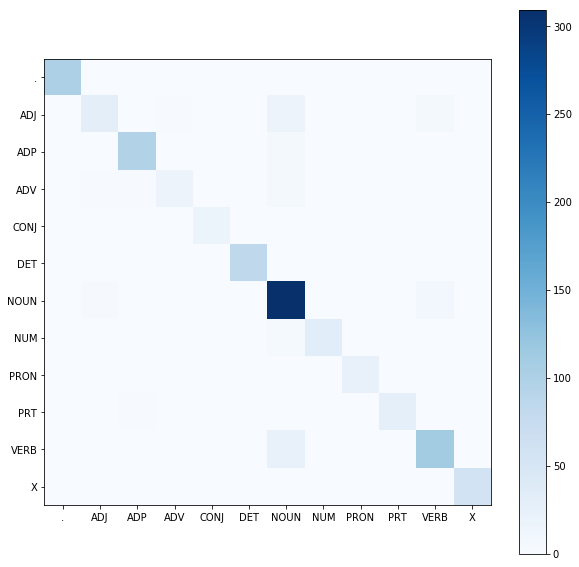

In [26]:
plt.figure(figsize=(10, 10))
plt.xticks(np.arange(len(rf.classes_)), rf.classes_)
plt.yticks(np.arange(len(rf.classes_)), rf.classes_)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()

In [27]:
feature_list = zip(dict_vectorizer.get_feature_names(), rf.feature_importances_)
sorted_features = sorted(feature_list, key = lambda x: x[1], reverse=True)
print(sorted_features[0:20])

[('prefix3=the', 0.020947444088563662), ('prefix2=th', 0.01783827470866413), ('capitalized', 0.013513036162753617), ('dist_from_last', 0.013447965173992368), ('numeric', 0.01300385712792294), ('suffix1=d', 0.012771598710170903), ('suffix3=.', 0.012557209640168288), ('prefix1=,', 0.012435668528612734), ('dist_from_first', 0.012213640769151535), ('suffix3=,', 0.011323688108295895), ('word=.', 0.011210955853211874), ('prefix3=,', 0.010660961417136485), ('word=,', 0.01051963141455019), ('word=the', 0.010062594593034173), ('suffix2=ed', 0.009578523984418039), ('prefix3=and', 0.00927271750180412), ('prefix2=*T', 0.009253924957123386), ('suffix1=,', 0.009109686332015168), ('suffix1=s', 0.00883222882121262), ('word=of', 0.008500673871986664)]
